# Project: Wrangling and Analyze Data

In [2]:
import sys
import json
import os
import re
import requests
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")


In [4]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [7]:
#reading data from the website 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

In [8]:
with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [9]:
image_pred = pd.read_csv("image_predictions.tsv", sep='\t')
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
import tweepy

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
tweetIDs = twitter_archive.tweet_id

In [8]:
# Query Twitter's API for the JSON data of each tweet ID in the Twitter archive
# index = 0
# errors = {}
# # Saving returned JSON data to a text file
# with open ('tweet_json.txt', 'w') as tjFile:
#     for tweetID in tweetIDs:
#         try:
#             # Get the status data for each of the tweet IDs
#             tweet = api.get_status(tweetID, tweet_mode = 'extended')
#             json.dump(tweet._json, tjFile)
#             # adding a line break
#             tjFile.write("\n")
            
#         # Caching exceptions
#         except tweepy.TweepyException as error:
#             # Appending the errors to the dictionary
#             errors[tweetID] = error
            
# end = time.time()
# print(end - start)


In [11]:
#Opening the text file
tweets = []
dataFile = ""
with open('tweet_json.txt','r') as tjFile:
    dataFile = tjFile.readlines()

In [12]:
#Loading data from the text file to a List
for row in dataFile:
    #loading json
    tweet = json.loads(row)
    #appending tweets to list
    tweets.append({
        'tweet_id':tweet['id'],
        'retweet_count':tweet['retweet_count'],
        'favorite_count':tweet['favorite_count'],
        'followers_count':tweet['user']['followers_count'],
        'friends_count':tweet['user']['friends_count']
    })


In [13]:
# Loading list to the dataFrame
tweet_jason= pd.DataFrame(tweets, columns=['tweet_id', 'retweet_count', 'favorite_count', 'followers_count', 'friends_count'])
tweet_jason.head()

,tweet_id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [14]:
# checking the columns and datatypes of he twitter_archive dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
# checking if there any duplicates 
sum(twitter_archive.tweet_id.duplicated())

0

In [14]:
# checking the names with lower cases 
twitter_archive[twitter_archive.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
actually         2
getting          2
not              2
mad              2
my               1
life             1
such             1
incredibly       1
infuriating      1
space            1
light            1
all              1
old              1
this             1
his              1
unacceptable     1
by               1
officially       1
Name: name, dtype: int64

In [61]:
#checking how many different values and their counts that are in doggo column
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [62]:
# checking the total nulls in 'in_reply_to_user_id' column
twitter_archive.in_reply_to_user_id.isnull().sum()

2278

In [63]:
# checking the total nulls in 'in_reply_to_status_id' column
twitter_archive.in_reply_to_status_id.isnull().sum()

2278

In [64]:
#checking the total nulls in retweeted_status_id column
twitter_archive.retweeted_status_id.isnull().sum()


2175

In [65]:
# checking different values and heir counts in rating numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [66]:
# Checking if rating_numerator values which are greater than 20 have been incorrectly populated
twitter_archive[twitter_archive.rating_numerator >= 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [67]:
#checking total number of rows and columns that are in twitter_archive
twitter_archive.shape

(2356, 17)

In [68]:
# checking the name columns and data types in 'image_pred' dataset
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [69]:
# checking for duplicates
image_pred.duplicated().sum()

0

In [70]:
# checking the name columns and data types in '# checking the name columns and data types in 'image_pred' dataset' dataset
tweet_jason.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id           2354 non-null int64
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
friends_count      2354 non-null int64
dtypes: int64(5)
memory usage: 92.0 KB


In [71]:
# checking for duplicates
tweet_jason.duplicated().sum()

0

### Quality issues
1. Delete retweets.

2. **retweeted_status_id, retweeted_status_user _id, and retweeted_status_timestamp, in_reply_to_user_id, in_reply_to_status_id** most of their values are empty.

3. The rows with information after August 1 2017 are not necessary since they are not going to be used for the analysis.

4. **timestamp** datatype is a string instead of datetime, **rating_numerator** and **rating_denominator**  has int datatype instead of float, **tweet_id** is int instead of string.

5. Columns **source**,**expanded_urls**, do not seem to be useful for analysis. So we do not need them.

6. **p1, p2, p3** columns contains mixed cases, there is no consistency.

7. The ratings with decimals were not exrated correctly e.g 9.75 was recorded as 75

8. All the names with lower cases do not seem to be real names.

### Tidiness issues
1. The last 4 columns in twitter_archive dataset should be one column since they all represents dogstage and they should be deleted after.

3. twitter_archive_clean, image_pred_clean, twet_jason , these should be one dataset

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [15]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_pred_clean = image_pred.copy()
twet_jason = tweet_jason.copy()

### Cleaning Quality Issues

### Issue #1:
Delete retweets

#### Define
drop retweets rows

#### Code


In [16]:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_id)]
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.in_reply_to_status_id)]

#### Test

In [17]:
# checking if the rows had been deleted
twitter_archive_clean.shape

(2097, 17)

### Issue #2: 
retweeted_status_id, retweeted_status_user id, and retweeted_status_timestamp, in_reply_to_user_id, in_reply_to_status_id most of their values are empty.

#### Define: 
Drop retweeted_status_id, retweeted_status_user id, and retweeted_status_timestamp, in_reply_to_user_id, in_reply_to_status_id.

#### Code

In [17]:
# Dropping retweeted_status_id, retweeted_status_user id, and retweeted_status_timestamp,
# in_reply_to_user_id, in_reply_to_status_id.
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id',
                                              'retweeted_status_user_id', 
                                              'retweeted_status_timestamp', 
                                              'in_reply_to_user_id', 
                                              'in_reply_to_status_id'], axis = True)

#### Test

In [21]:
# Testing if the cplumns have been successfully dropped
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue #3:
The rows with information after August 1 2017 are not necessary since they are not going to be used for the analysis.

#### Define
Filter out data from 1 August 2017. keep the data from 31 July 2017 backwards

#### Code

In [18]:
# removing data from 1 August 2017 its not necesaary
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['timestamp'] < '2017-8-1']

#### Test

In [23]:
#checking if the unecessary data has beed removed
twitter_archive_clean.timestamp.max()

'2017-08-01 16:23:56 +0000'

In [24]:
twitter_archive_clean.timestamp.min()

'2015-11-15 22:32:08 +0000'

### Issue #4: 
timestamp datatype is a string instead of datetime, rating_numerator and rating_denominator  has int datatype instead of float, tweet_id is int instead of string.


#### Define
Change timestamp datatype from string to datetime.

Change tweet_id from int to string.

Change rating_numerator and rating_denominator to float.



#### Code

In [19]:
# changing timestamp datatype from string to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp) 

In [20]:
# changing tweet_id from int to string in twitter_archive_clean 
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

In [21]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)

In [22]:
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

In [23]:
# changing tweet_id from int to string in image_pred_clean
image_pred_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

In [24]:
#changing tweet_id from int to string in twet_jason_clean
twet_jason['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

#### Test

In [25]:
# checking the datatypes
twitter_archive_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

### Issue #5:
Columns source, expanded_urls do not seem to be useful for analysis. So we do not need them.

#### Define
 Drop source, expanded_urls

#### Code

In [25]:
#Dropping source and expanded_urls columns
twitter_archive_clean.drop(['source','expanded_urls'],axis=1, inplace = True)

#### Test

In [26]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 260.2+ KB


### Issue #6:
p1, p2, p3 columns contains mixed cases, there is no consistency.

#### Define
change all values in p1, p2, p3 to lower case

#### Code

In [27]:
#changing p1 values to lower case
image_pred_clean['p1'] = image_pred_clean['p1'].str.lower()

In [28]:
#changing p2 values to lower case
image_pred_clean['p2'] = image_pred_clean['p2'].str.lower()

In [29]:
# changing p3 values to lower case
image_pred_clean['p3'] = image_pred_clean['p3'].str.lower()

#### Test

In [34]:
#checking if all values in p1, p2, p3 are in lower case
image_pred_clean[['p1', 'p2', 'p3']].sample(10)

,p1,p2,p3
248,dandie_dinmont,west_highland_white_terrier,clumber
804,chihuahua,teddy,west_highland_white_terrier
389,english_setter,brittany_spaniel,ibizan_hound
1322,geyser,volcano,fountain
1919,flat-coated_retriever,labrador_retriever,groenendael
1434,old_english_sheepdog,maltese_dog,soft-coated_wheaten_terrier
1022,old_english_sheepdog,wire-haired_fox_terrier,lakeland_terrier
87,hare,dhole,chesapeake_bay_retriever
98,fire_engine,tow_truck,jeep
585,eskimo_dog,siberian_husky,chihuahua


### Issue #7:
The ratings with decimals were not exrated correctly e.g 9.75 was recorded as 75

### Define
Replace rating_numerator 0f 75 with 9.75

#### Code

In [30]:
# replacing 75 with 9.75
twitter_archive_clean['rating_numerator'] = np.where(twitter_archive_clean['rating_numerator']== 75, 9.75,twitter_archive_clean['rating_numerator'])

#### Test

In [36]:

twitter_archive_clean[twitter_archive_clean.rating_numerator == 9.75]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",9.75,10,Logan,None,None,None,None


### Issue #8
All the names with lower cases do not seem to be real names.

#### Define
Change all dog names in lower case to None because those names do not represent ral names

### Code

In [31]:
mask = twitter_archive_clean.name.str.contains('^[a-z]', regex = True)
twitter_archive_clean.name.replace(twitter_archive_clean[mask].name, 'None', inplace = True)

### Test

In [38]:
# checking if name column has lower case vales
twitter_archive_clean.name.value_counts()

None         707
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Lola           8
Sadie          8
Winston        8
Toby           7
Daisy          7
Koda           6
Bo             6
Jax            6
Bella          6
Bailey         6
Oscar          6
Stanley        6
Bentley        5
Leo            5
Milo           5
Louis          5
Scout          5
Dave           5
Rusty          5
Buddy          5
Chester        5
Gary           4
Derek          4
            ... 
Caryl          1
Zuzu           1
Bones          1
Tedders        1
Glacier        1
Mairi          1
Tedrick        1
Nigel          1
Skye           1
Beckham        1
JD             1
Eve            1
Brownie        1
Jeb            1
Cal            1
Bronte         1
Rufio          1
Beemo          1
Remy           1
Bowie          1
Trip           1
Kial           1
Philippe       1
Jamesy         1
Kathmandu      1
Skittles       1
Sailer         1
Kendall       

### Cleaning Tideness Issues

### Issue #1:
The last 4 columns in twitter_archive dataset should be one column since they all represents dogstage and they should be deleted after.

#### Define
Concatinating doggo, floofer, pupper, puppo into one column called stage and drop the columns there after.

#### Code

In [32]:
# replacing none and null values in dog stage columns to '' 
# cleaning doggo column
twitter_archive_clean.doggo.replace('None', '', inplace=True) 
twitter_archive_clean.doggo.replace(np.NaN, '', inplace=True)

# cleaning floofer column
twitter_archive_clean.floofer.replace('None', '', inplace=True) 
twitter_archive_clean.floofer.replace(np.NaN, '', inplace=True)

# cleaning pupper column
twitter_archive_clean.pupper.replace('None', '', inplace=True) 
twitter_archive_clean.pupper.replace(np.NaN, '', inplace=True)

# cleaning puppo column
twitter_archive_clean.puppo.replace('None', '', inplace=True) 
twitter_archive_clean.puppo.replace(np.NaN, '', inplace=True)

In [33]:
#concatinating cplumns
twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo 

twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

In [34]:
#dropping doggo, floofer, pupper, puppo
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [36]:
twitter_archive_clean.sample(20)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
1180,719339463458033665,2016-04-11 01:41:07,Say hello to Lucy and Sophie. They think they'...,10.0,10.0,Lucy,
1746,679132435750195208,2015-12-22 02:52:45,This is Louis. He's a river dancer. His friend...,10.0,10.0,Louis,
1396,699788877217865730,2016-02-17 02:54:04,Say hello to Nala. She's a Freckled High Brusc...,12.0,10.0,Nala,
2029,671855973984772097,2015-12-02 00:58:41,Remarkable dog here. Walks on back legs really...,8.0,10.0,None,
362,829449946868879360,2017-02-08 22:00:52,Here's a stressed doggo. Had a long day. Many ...,11.0,10.0,None,doggo
831,768609597686943744,2016-08-25 00:43:02,This is Lou. His sweater is too small and he a...,10.0,10.0,Lou,
607,798209839306514432,2016-11-14 17:03:50,This is Cooper. His bow tie was too heavy for ...,13.0,10.0,Cooper,
375,828361771580813312,2017-02-05 21:56:51,Beebop and Doobert should start a band 12/10 w...,12.0,10.0,None,
1773,678255464182861824,2015-12-19 16:47:58,This is Jessifer. She is a Bismoth Teriyaki. F...,9.0,10.0,Jessifer,
2234,668190681446379520,2015-11-21 22:14:07,This is Skittles. I would kidnap Skittles. Pin...,12.0,10.0,Skittles,


### Issue #2:
twitter_archive_clean, image_pred_clean, twet_jason , these should be one dataset

#### Define
Merge twitter_archive_clean, image_pred_clean, twet_jason into one dataset

#### Code

In [37]:
# merging 3 datasets into 1
twitter_whole_clean = pd.merge(twitter_archive_clean,image_pred_clean, on = 'tweet_id', how = 'inner').merge(twet_jason, on = 'tweet_id', how = 'inner')

#### Test

In [38]:
#checking if the dataset is merged successfully
twitter_whole_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,...,collie,0.156665,True,shetland_sheepdog,0.061428,True,8853,39467,3200889,104
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,...,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,6514,33819,3200889,104
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,...,malinois,0.138584,True,bloodhound,0.116197,True,4328,25461,3200889,104
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,8964,42908,3200889,104
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,...,rottweiler,0.243682,True,doberman,0.154629,True,9774,41048,3200889,104


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [39]:
# saving the cleaned dataset
twitter_whole_clean.to_csv('twitter_archive_master.csv', index = False)

In [40]:
# testing if the dataset was saved correctly
data = pd.read_csv('twitter_archive_master.csv')
data.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,...,collie,0.156665,True,shetland_sheepdog,0.061428,True,8853,39467,3200889,104
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,...,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,6514,33819,3200889,104
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,...,malinois,0.138584,True,bloodhound,0.116197,True,4328,25461,3200889,104
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,...,redbone,0.360687,True,miniature_pinscher,0.222752,True,8964,42908,3200889,104
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,...,rottweiler,0.243682,True,doberman,0.154629,True,9774,41048,3200889,104


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [41]:
# checking the maximum favorite_count
twitter_whole_clean.favorite_count.max()

132810

In [42]:

twitter_whole_clean[twitter_whole_clean.favorite_count == 132810]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,followers_count,friends_count
324,822975315408461824,2017-01-22 01:12:59,This is Albus. He's soaked as h*ck. Seems to h...,12.0,10.0,Albus,,https://pbs.twimg.com/media/CVo-JuMWwAAet6F.jpg,1,jack-o'-lantern,...,schipperke,0.115984,True,miniature_pinscher,0.052175,True,48265,132810,3200894,104


In [43]:
#checking the names in the name column and their counts
twitter_whole_clean.name.value_counts()

None          581
Charlie        11
Lucy           11
Oliver         10
Cooper         10
Sadie           8
Penny           8
Tucker          8
Lola            8
Winston         7
Toby            7
Bailey          6
Oscar           6
Bo              6
Stanley         6
Daisy           6
Jax             6
Bella           6
Leo             5
Koda            5
Milo            5
Louis           5
Buddy           5
Bentley         5
Gary            4
Oakley          4
Winnie          4
Finn            4
Chester         4
Reggie          4
             ... 
Blipson         1
Balto           1
Fillup          1
Bode            1
Pippin          1
Dietrich        1
Grady           1
Jersey          1
Brandonald      1
Bobbay          1
Sky             1
Kenzie          1
Stewie          1
Grizzie         1
Pancake         1
Tess            1
Hector          1
Ivar            1
Major           1
Dido            1
Sweets          1
Betty           1
Stephan         1
River           1
Ralphson  

In [44]:
twitter_whole_clean.shape

(1822, 22)

In [45]:
#checking the dog stage and their counts
twitter_whole_clean.stage.value_counts()

                 1486
pupper            221
doggo              72
puppo              23
floofer             9
doggo,pupper        9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

### Insights:
1. '822975315408461824' is the tweet_id of the dog with maximum favorite_count of 132810 and its name is Albus.

2. The most popular dog name is Charlie and Lucy.

3. The most popular stage is pupper and 1486 of the dog stages were not recorded.

### Visualization

### Question 1: Is there any relationship between retweet_count and favorite_counts

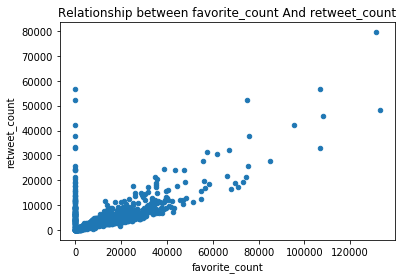

In [46]:
# scatter plot showing the relationship


plt.figure(figsize =(10,8)) 

twitter_whole_clean.plot.scatter(x = 'favorite_count', y = 'retweet_count')

plt.title('Relationship between favorite_count And retweet_count')
plt.show()

In [47]:
# to clearly check how strong is the relationship
twitter_whole_clean[['retweet_count', 'favorite_count']].corr()

,retweet_count,favorite_count
retweet_count,1.000000,0.701709
favorite_count,0.701709,1.000000


### Question 2: What are the top ten popular dog names

In [48]:
# 10 most popular names shown on a bar graph
top_ten =twitter_whole_clean.copy()
top_ten = top_ten.name.value_counts().to_frame()


In [49]:
# resetting index
top_ten = top_ten.reset_index()

In [50]:
top_ten.head()

,index,name
0,None,581
1,Charlie,11
2,Lucy,11
3,Oliver,10
4,Cooper,10


In [51]:
# taking the top ten names
top_ten = top_ten.head(10)

In [52]:
#renaming columns
top_ten = top_ten.rename(columns = {'index':'name','name':'frequency'})

In [53]:
# dropping the outlier None, the dongs without names
top_ten.drop([0], axis = 0, inplace = True)

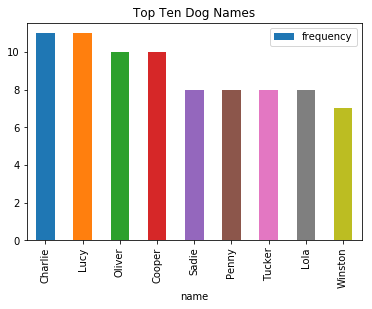

In [54]:
# a bar graph showing top ten dog names
top_ten.plot.bar(x = 'name', y = 'frequency')
plt.title('Top Ten Dog Names')
plt.show()